In [3]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Read edge list from .csv file
edge_list_file = 'Surat.csv'
G = nx.Graph()

# Read the edge list and create the graph
with open(edge_list_file, 'r') as f:
    reader = csv.reader(f)
    next(reader)  # Skip header row if present
    for row in reader:
        source = row[0]
        target = row[1]
        G.add_edge(source, target)

In [4]:
# Compute the betweenness centrality of each node
betweenness_centrality = nx.betweenness_centrality(G)

# Extract betweenness centrality values
centrality_values = list(betweenness_centrality.values())

# Sort the betweenness centrality values in descending order (to get ranks)
centrality_sorted = sorted(centrality_values, reverse=True)

# Rank the nodes based on betweenness centrality (1-based rank)
ranks = np.arange(1, len(centrality_sorted) + 1)

# Power-law function to fit to the data: f(x) = a * x^(-b)
def power_law(x, a, b):
    return a * np.power(x, -b)

# Perform the power-law fit (fitting to log-log data)
x = ranks
y = centrality_sorted
popt, pcov = curve_fit(power_law, x, y)

# Extract the power-law exponent (b) and the constant (a)
exponent = popt[1]
exponent = round(exponent, 2)

# Calculate R²
residuals = y - power_law(x, *popt)
ss_res = np.sum(residuals ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)
r_squared = round(r_squared, 2)

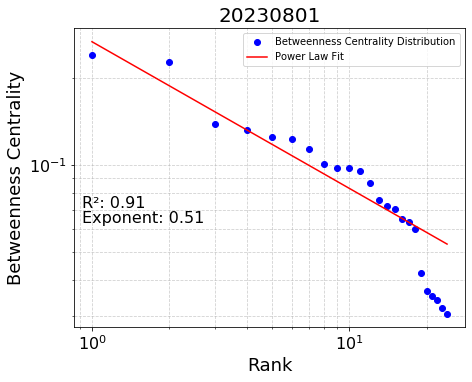

Power law exponent: 0.51
R² value: 0.91


In [5]:
# Create the log-log plot with power-law fit
plt.figure(figsize=(7, 5.5))

# Plot the betweenness centrality distribution (log-log)
plt.loglog(ranks, centrality_sorted, 'bo', label='Betweenness Centrality Distribution')

# Plot the power-law fit
plt.loglog(x, power_law(x, *popt), 'r-', label=f'Power Law Fit')

# Label the axes and title
plt.xlabel('Rank', fontsize=18)
plt.ylabel('Betweenness Centrality', fontsize=18)
plt.title('Surat', fontsize=20)

# Display R² and exponent on the plot
plt.text(0.02, 0.4, f'R²: {r_squared:.2f}', transform=plt.gca().transAxes, fontsize=16)
plt.text(0.02, 0.35, f'Exponent: {exponent:.2f}', transform=plt.gca().transAxes, fontsize=16)

# Add grid, legend, and axis ticks
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.legend()

# Adjust font size for readability
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Show the plot
plt.show()

# Print R² and exponent
print(f'Power law exponent: {exponent}')
print(f'R² value: {r_squared}')